In [92]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import pandas as pd

# Read in our .csv data
data = pd.read_csv('datasets\earthquakes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [93]:
# Snag the Latitude/Longitude values to use as the coordinates for our plot graph
plotPoints = data[['Latitude', 'Longitude']]
plotPoints.info()

# Convert to a Numpy array
numpyPP = plotPoints.to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   23412 non-null  float64
 1   Longitude  23412 non-null  float64
dtypes: float64(2)
memory usage: 365.9 KB


In [94]:
# Estimating bandwidth of the plot points using half of them
bandwidth = estimate_bandwidth(numpyPP, quantile = 0.04, n_samples = 500)

# Begin clustering, and pull additional data (a label of each point, and coords of cluster centers)
meanShift = MeanShift(bandwidth = bandwidth, bin_seeding = True)
meanShift.fit(numpyPP)

labels = meanShift.labels_
clusterCenters = meanShift.cluster_centers_

# Finding the unique labels gives us how many clusters were found
uniqueLabels = np.unique(labels)
nClusters = len(uniqueLabels)

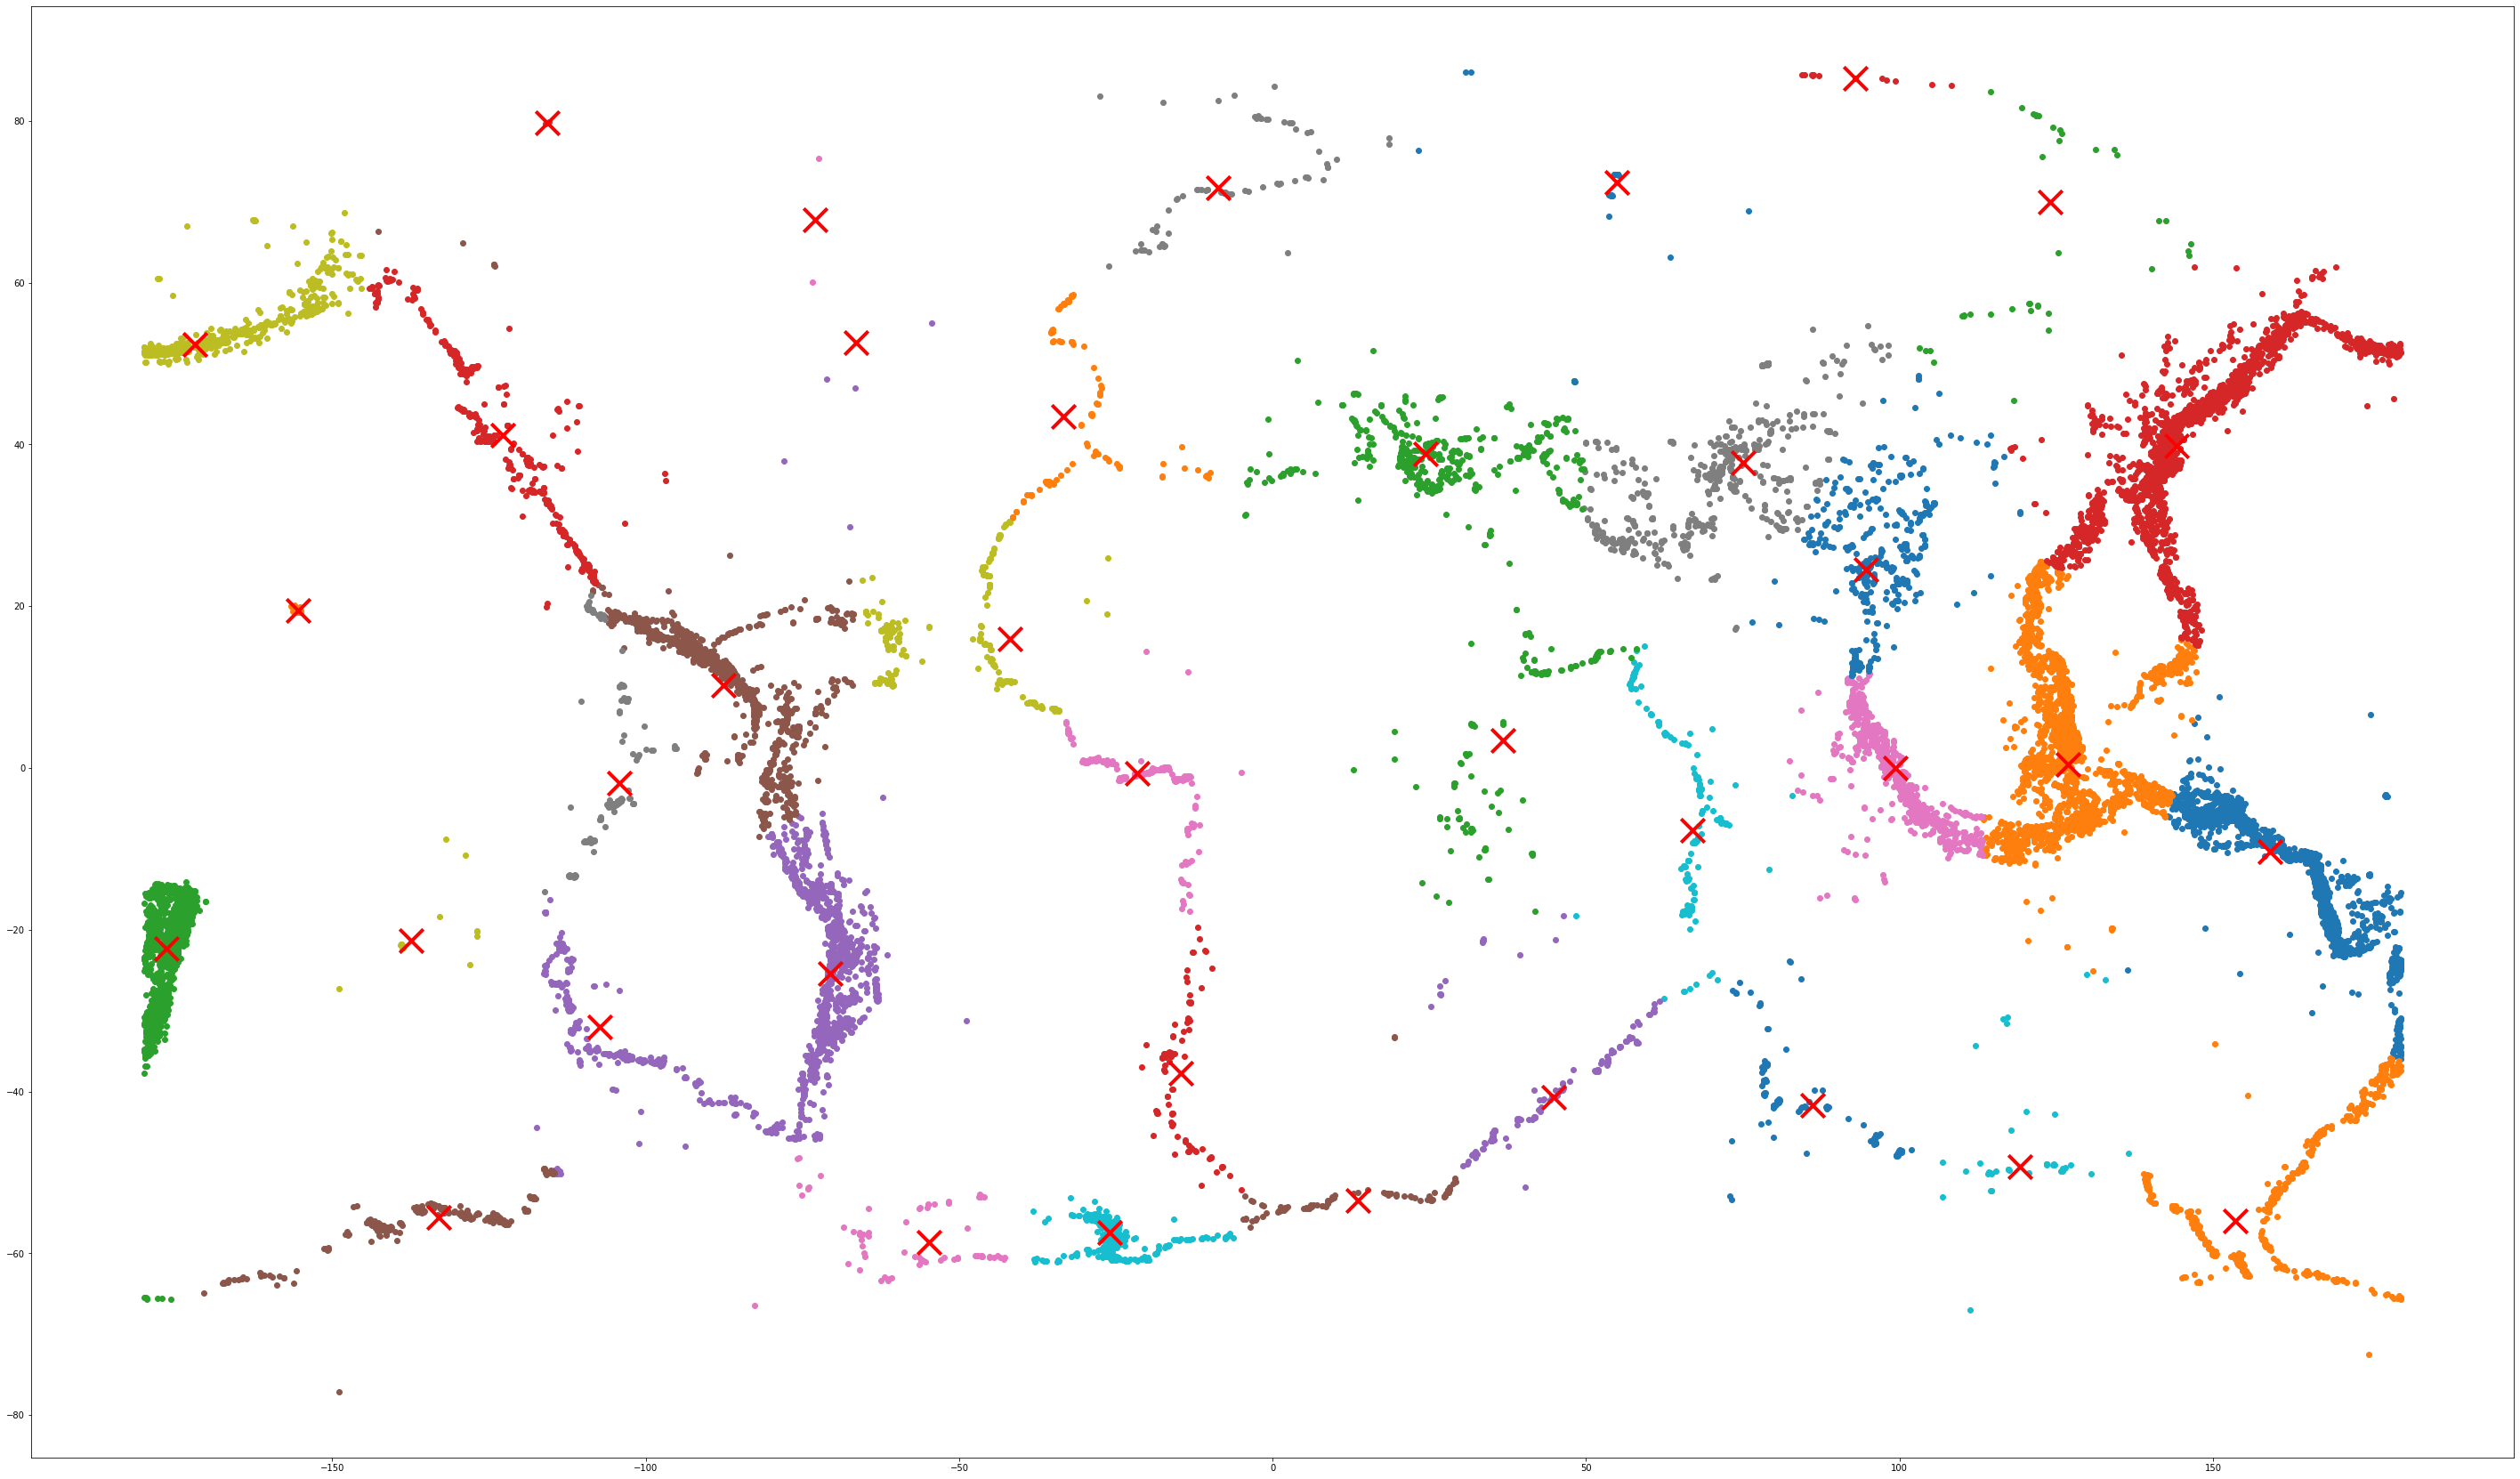

In [95]:
# Plot Mean Shift's approximation of the earthquake hotspots
from itertools import cycle

plt.figure(figsize=(50,30))

# Each color is a different cluster of points
colors = cycle('bgcmykbgcmykbgcmykbgcmyk')
for k, col in zip(range(nClusters), colors):

    myMembers = labels == k
    clusterCenter = clusterCenters[k]
    plt.scatter(numpyPP[myMembers, 1], numpyPP[myMembers, 0], marker ='o')
    
    # Plots the approximate center of the cluster
    plt.scatter(clusterCenter[1], clusterCenter[0], marker ='x', color ='red', s = 700, linewidth = 4)

plt.show()